<a href="https://colab.research.google.com/github/benjaminnigjeh/DIAMS/blob/main/benchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and dependancies

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from keras.layers import Dropout

# Import training and test datasets

In [2]:
trainingDataset = files.upload_file('trainingDataset')
testDataset = files.upload_file('testDataset')

Saved training_dataset.csv to /content/trainingDataset


Saved test_dataset.csv to /content/testDataset


# Dataset wrangling

In [3]:
file_path = '/content/trainingDataset'
X = pd.read_csv(file_path)
Y_train = X.pop("target")
X_train = X.copy()
X_train = np.array(X_train)
Y_train = np.array(Y_train)

file_path = '/content/testDataset'
X = pd.read_csv(file_path)
Y_test = X.pop("target")
X_test = X.copy()
X_test = np.array(X_test)
Y_test = np.array(Y_test)


# Helper functions

In [4]:
def predict(model, X_train, Y_train, X_test):
    clf = model.fit(X_train, Y_train)
    a = clf.predict_proba(X_test)
    return a[:, 1]

def aucGraph(model_probs, Y_test, model_title):
  model_auc = roc_auc_score(Y_test, model_probs)
  r_probs = [0 for _ in range(len(Y_test))]
  r_auc = roc_auc_score(Y_test, r_probs)
  r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
  nb_fpr, nb_tpr, _ = roc_curve(Y_test, model_probs)
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
  plt.plot(nb_fpr, nb_tpr, marker='.', label= model_title + '(AUROC = %0.3f)' % model_auc)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()


# Training the neural network algorithm

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.6897 - accuracy: 0.5714
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 0.5937 - accuracy: 0.6071
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 0.5691 - accuracy: 0.6071
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 0.4084 - accuracy: 0.9286
Epoch 5/5
1/1 [==============================] - 0s 97ms/step


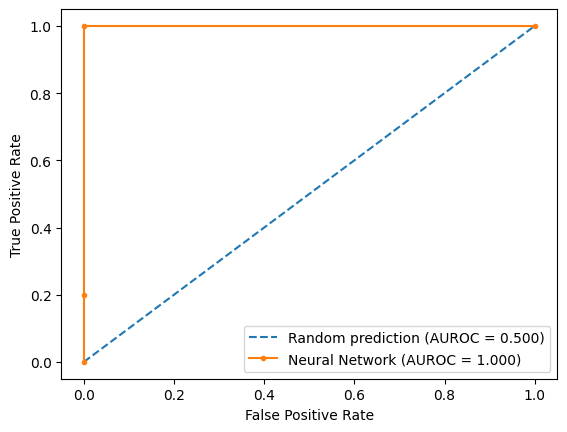

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(150, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(200, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')
model.fit(X_train, Y_train, epochs=5)
a = model.predict(X_test)
model_probs = a[:, 1]

aucGraph(model_probs, Y_test, model_title= 'Neural Network ')



# Benchmarking with SVM

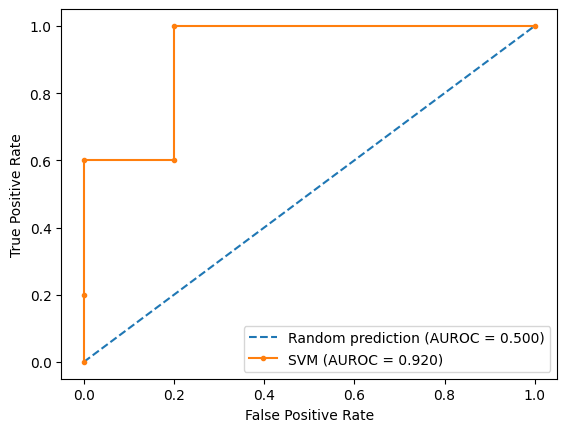

In [6]:
SVM_probs = predict(svm.SVC(probability=True), X_train, Y_train, X_test)
aucGraph(SVM_probs, Y_test, model_title= 'SVM ')

# Benchmarking with K-nearst neighbors algorithm

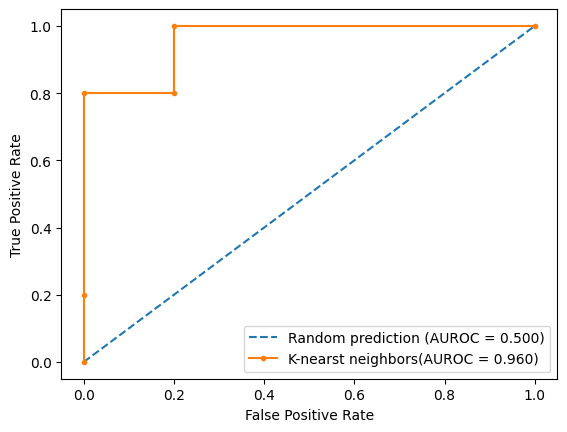

In [7]:
KN_probs = predict(KNeighborsClassifier(n_neighbors=15, metric='l2', weights='distance'),
                 X_train, Y_train, X_test)
aucGraph(KN_probs, Y_test, model_title= 'K-nearst neighbors')

# Benchmarking with logestic regression algorithm

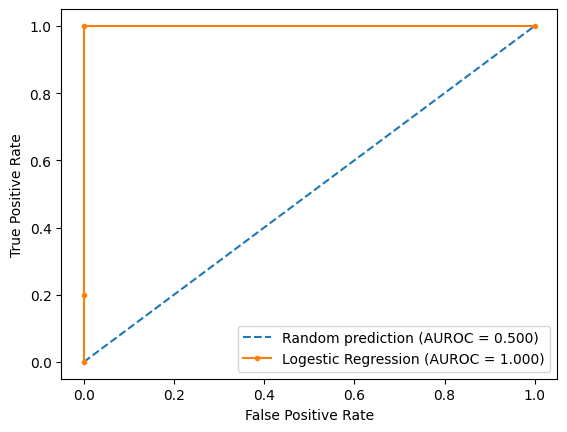

In [8]:
LR_probs = predict(LogisticRegression(penalty='l2', multi_class='multinomial', solver='lbfgs'),
                X_train, Y_train, X_test)
aucGraph(LR_probs, Y_test, model_title= 'Logestic Regression ')

# Benchmarking with bernoulli NB algorithm

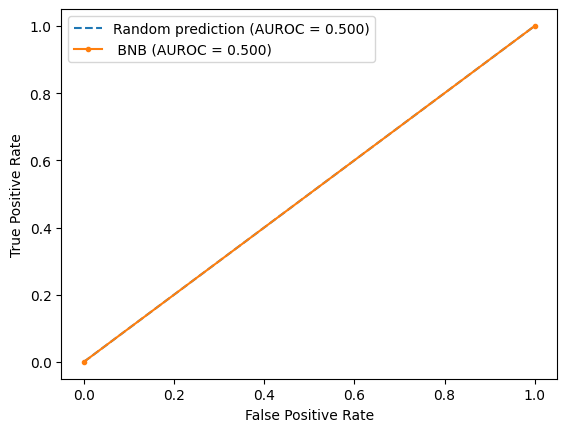

In [9]:
BNB_probs = predict(BernoulliNB(),
                X_train, Y_train, X_test)
aucGraph(BNB_probs, Y_test, model_title= ' BNB ')

#Benchmarking with multinomial NB algorithm

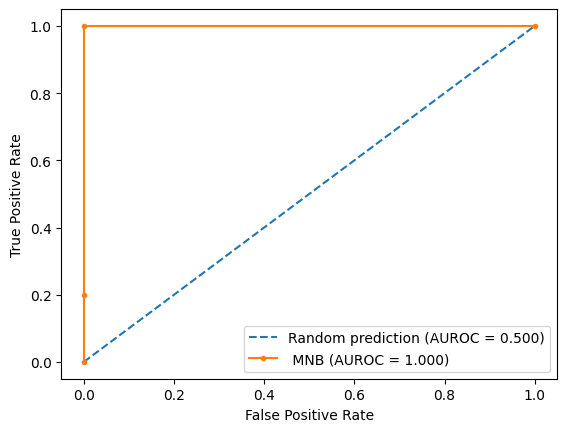

In [10]:
MNB_probs = predict(MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
                X_train, Y_train, X_test)
aucGraph(MNB_probs, Y_test, model_title= ' MNB ')

#Benchmarking with decision tree algorithm

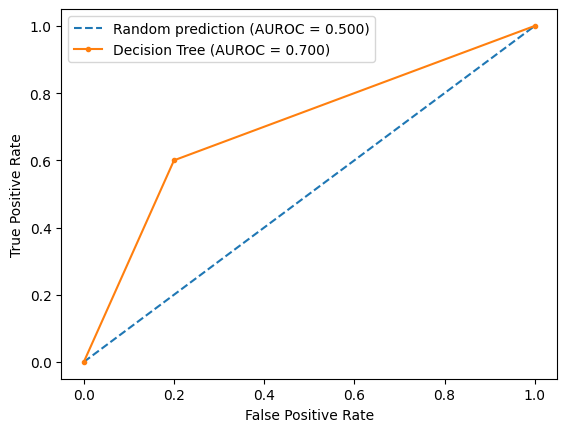

In [11]:
DT_probs = predict(DecisionTreeClassifier(),
                X_train, Y_train, X_test)
aucGraph(DT_probs, Y_test, model_title= 'Decision Tree ')

#Benchmarking with Random Forest algorithm

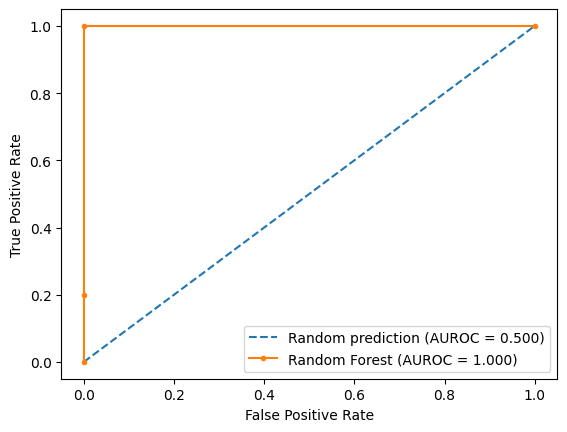

In [12]:
RF_probs = predict(RandomForestClassifier(max_features= 5, max_depth=2, n_estimators= 500, random_state=0),
                X_train, Y_train, X_test)
aucGraph(RF_probs, Y_test, model_title= 'Random Forest ')

# Benchmarking with Gaussian NB algorithm

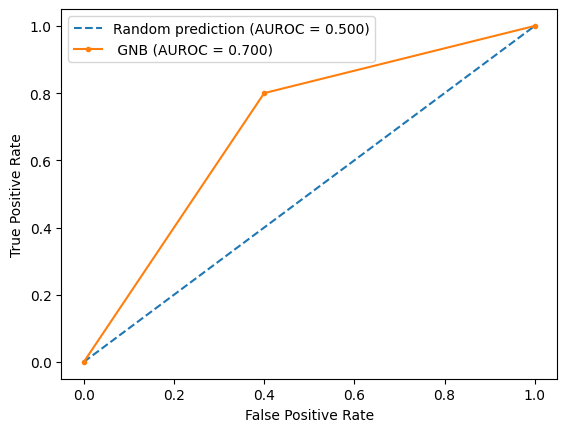

In [13]:
GNB_probs = predict(GaussianNB(), X_train, Y_train, X_test)
aucGraph(GNB_probs, Y_test, model_title= ' GNB ')